In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [3]:
df=pd.read_csv('Heart_Disease_Prediction.csv')
print(df.isnull().sum())

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


# Description of Variables

Age  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Continuous<br>
Sex  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;  Binary (1=male; 0=female)<br>
Chest pain type  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Categorical (1 = typical (definite angina), 2 = asymptomatic (neither causing nor exibiting symptoms), <br> 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 3 = nonanginal (chest pain that resembles angina in patients that do not have heart disease), <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; 4 = atypical (chest pain that does not meet criteria for angina)<br>
BP  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\;\;\;\;$  Continous<br>
Cholesterol  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Continous<br>
FBS over 120 (Fasting Blood Sugar) &emsp;&emsp; $\;\;$Binary (1 = true; 0 = false)<br>
EKG (Electrocardiogram) &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\;\;\;$ Categorical (Resting electrocardiographic results)<br>
Max HR  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\;\;\;$  Continous<br>
Exercise angina &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\;\;$  Binary (Exercise induced angina 1 = yes; 0 = no)<br>
ST depression   &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\;\;\;$ Continous<br>
Slope of ST    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\;\;$  Categorical (Slope of the peak exercise ST segment Upsloping, flat, downsloping)<br>
Number of vessels fluro   &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\;$  Categorical (Number of major vessels colored by flouroscopy 0 - 3)<br>
Thallium &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\;\;\;\;\;\;$ Categorical (3 = normal; 6 = fixed defect; 7 = reversable defect) A reversible <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\;\;\;\;\;\;$defect is when the heart takes up the nuclear tracer at rest but not during cardiac stress<br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\;\;\;\;\;\;$ Fixed defect is when it will not take up the tracer at all<br>
Heart Disease &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $\;$Binary (1=yes, 0=no)<br>

# Data Exploration of Independent Variables


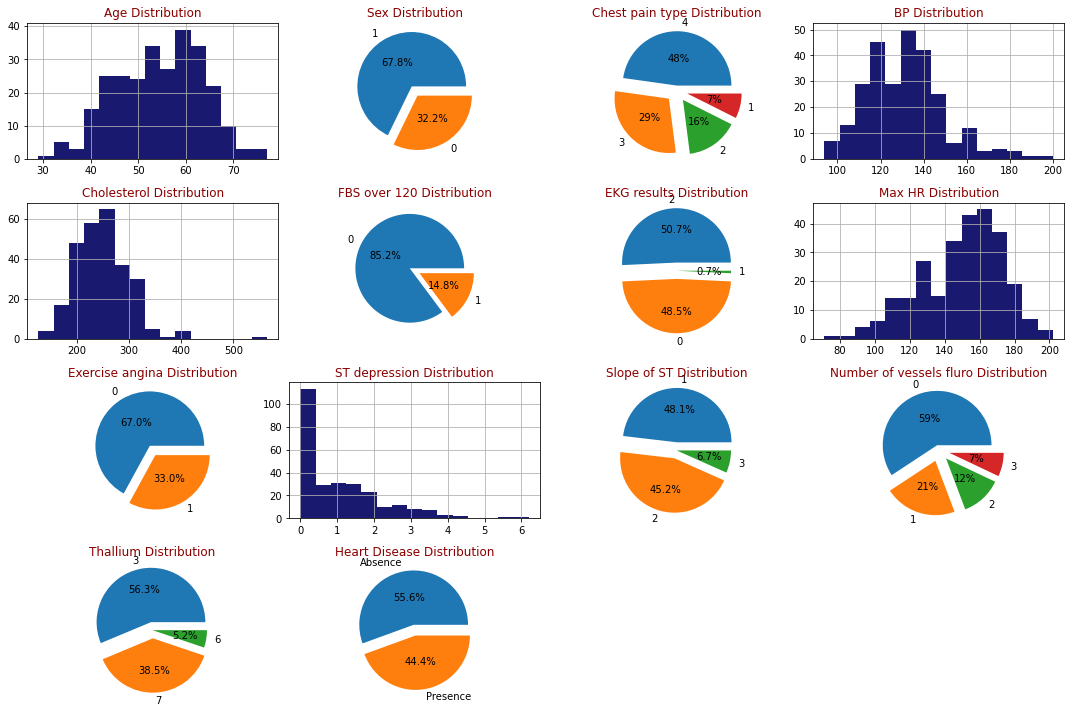

In [4]:
def draw_histogram(dataframe, features, rows, cols):
    #creating a figure object
    fig=plt.figure(figsize=(15,10))
    pie1=[i for i in list(features) if i in ('Sex', 'FBS over 120', 'Exercise angina', 'Heart Disease')]
    pie2=[i for i in list(features) if i in ('EKG results', 'Slope of ST', 'Thallium')]
    pie3=[i for i in list(features) if i in ('Chest pain type', 'EKG results', 'Slope of ST', 'Number of vessels fluro')]

    for i, feature in enumerate(features):
        #adding a subplot with a rowsxcols grid in spot i 
        #i starts from 1 and not 0 thus i+1
        ax=fig.add_subplot(rows, cols, i+1)
        #plotting the specific feature on the selected axis of the subplot
        if(feature in pie1):
            df[feature].value_counts().plot(kind='pie', autopct='%.1f%%', pctdistance=0.5, labeldistance=1.15, explode=(0.1, 0.1))
            plt.ylabel('')
            ax.set_title(feature+ " Distribution",color='DarkRed')
        elif(feature in pie2):
            df[feature].value_counts().plot(kind='pie', autopct='%.1f%%', pctdistance=0.6, labeldistance=1.15, explode=(0.15, 0.15, 0))
            plt.ylabel('')
            ax.set_title(feature+" Distribution",color='DarkRed')
        elif(feature in pie3):
            df[feature].value_counts().plot(kind='pie', autopct='%.0f%%', pctdistance=0.5, labeldistance=1.15, explode=(0.1, 0.2, 0.2, 0.2))
            plt.ylabel('')
            ax.set_title(feature+" Distribution",color='DarkRed')
        else:
            df[feature].hist(bins=15,ax=ax, facecolor='midnightblue')
            ax.set_title(feature+" Distribution",color='DarkRed')
    
    fig.tight_layout()
    plt.show()

draw_histogram(df,df.columns,4,4)


# First Feature: Age

We see that patients that have Heart Disease tend to be older in age in comparison to patients without Deart Disease

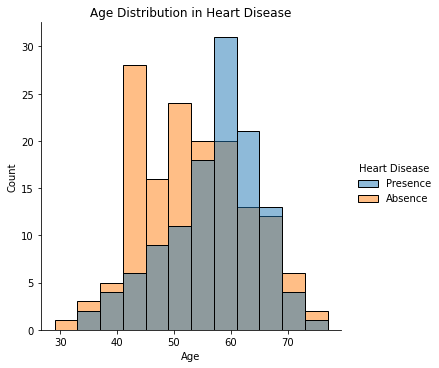

In [5]:
age=sns.displot(x='Age', hue='Heart Disease',data=df, fill=True)
age.set(title='Age Distribution in Heart Disease')
plt.show()


# Second Feature: Sex

From the graph below, it is easy to see that males are much more common to have Heart Disease in comparison to females

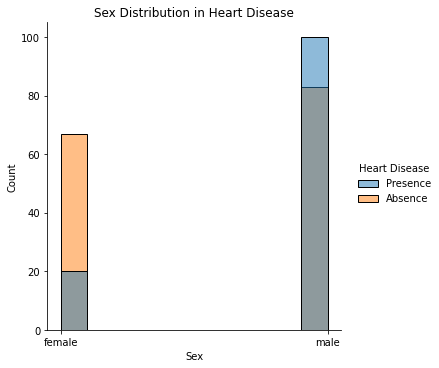

In [6]:
sex=sns.displot(x='Sex',hue='Heart Disease',data=df)
plt.xticks(range(0,2),['female', 'male'])
sex.set(title='Sex Distribution in Heart Disease')
plt.show()

# Third Feature: Chest Pain Type

From our grapgh, we can see that there are significantly more patients with Heart Disease that have atypical chest pain.
However, from our exploration of independent variables, we can see that patients with atypical chest pain account for 48% of our data. As a result, this may have skewed our results and the reason why we see much more patients with Heart disease and atypical chest pain in comparison to other types.

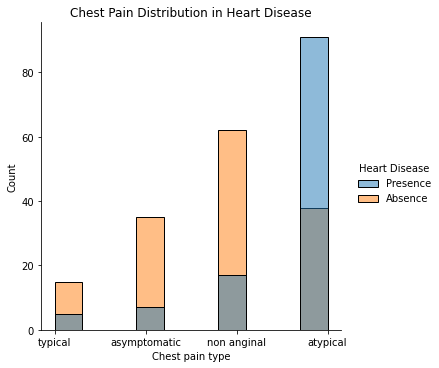

In [7]:
cp=sns.displot(x='Chest pain type',hue='Heart Disease',data=df)
cp.set(title='Chest Pain Distribution in Heart Disease')
plt.xticks(range(1,5),['typical','asymptomatic','non anginal','atypical'])
plt.show()

# Fourth Feature: Blood Pressure

Based on the graph below, the distribution of Blood Pressure among patients with and without Heart Disease is relatively the same. 

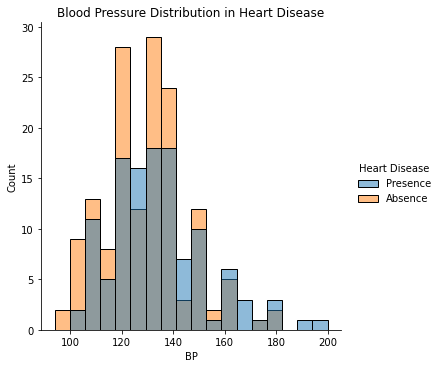

In [8]:
bp=sns.displot(x='BP',hue='Heart Disease',data=df)
bp.set(title='Blood Pressure Distribution in Heart Disease')
plt.show()

# Fifth Feature: Cholesterol

We can note that patients with Heart Disease have slightly higher cholesterol levels compared to patients without Heart Disease

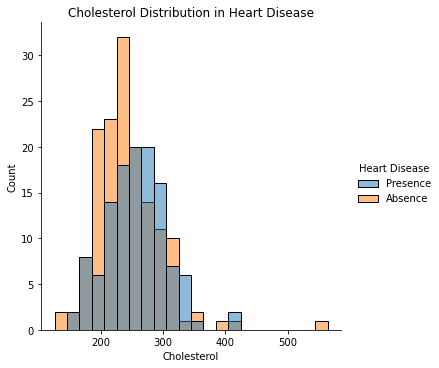

In [9]:
chol=sns.displot(x='Cholesterol',hue='Heart Disease',data=df)
chol.set(title='Cholesterol Distribution in Heart Disease')
plt.show()

# Sixth Feature: Max Heart Rate
We can see that patients with a lower maximum heart rate tend to more prominent in patients with Heart Disease rather than in patients without Heart Disease


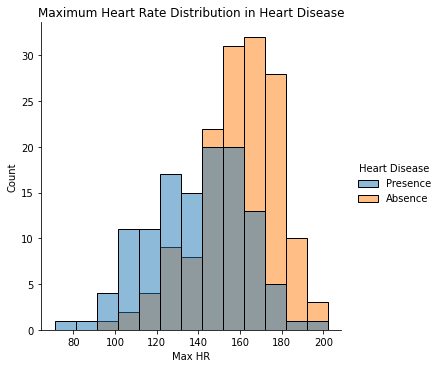

In [10]:
maxHR=sns.displot(x='Max HR',hue='Heart Disease',data=df)
maxHR.set(title='Maximum Heart Rate Distribution in Heart Disease')
plt.show()

# Seventh Feature: Exercise Angina


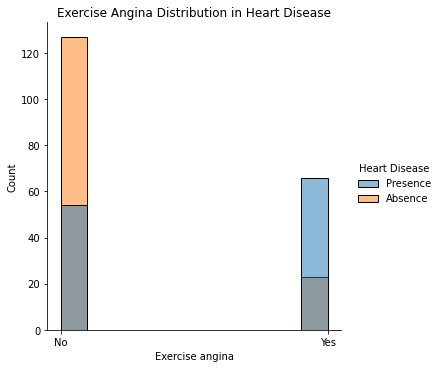

In [11]:
angina=sns.displot(x='Exercise angina',hue='Heart Disease',data=df)
plt.xticks(range(0,2),['No', 'Yes'])
angina.set(title='Exercise Angina Distribution in Heart Disease')
plt.show()

# Eighth Feature: Thallium

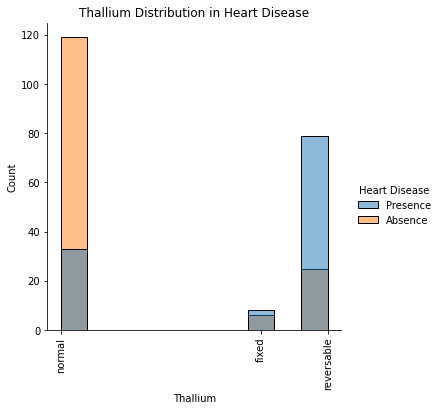

In [12]:
thallium=sns.displot(x='Thallium',hue='Heart Disease',data=df)
plt.xticks([3,6,7],['normal', 'fixed', 'reversable'], rotation='vertical')
thallium.set(title='Thallium Distribution in Heart Disease')
plt.show()

# Displaying count of patients with and without Heart Disease

In [13]:
#Displaying the count for benign and malignant patients
print('\n\nAmount of Patients with Heart Disease')
print(df['Heart Disease'].value_counts(), '\n')



Amount of Patients with Heart Disease
Absence     150
Presence    120
Name: Heart Disease, dtype: int64 



   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0

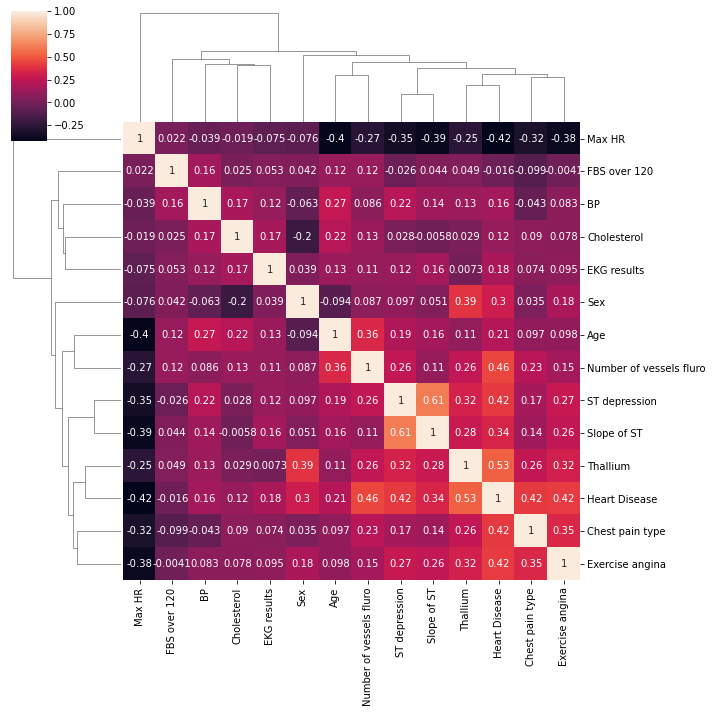

In [14]:
#Using label encoder to binarize the Heart Disease diagnoses
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Heart Disease']=le.fit_transform(df['Heart Disease'])
print(df.head())

#Printing the correlation matrix and plotting the heat map for better visualization
corr_matrix=df.corr()
sns.clustermap(corr_matrix, annot=True)
plt.show()

# Machine Learning

In [15]:
#------------------------------------------------------------------------
#----------------------------MACHINE LEARNING----------------------------
#------------------------------------------------------------------------

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as st
from statsmodels.tools import add_constant
import statsmodels.api as sm

In [16]:
#Splitting the independent and depenedent vairables 
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

#Standardizing the independent variables
scaler = StandardScaler()
x = scaler.fit_transform(x)

#Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


# Logistic Regression Classification Model

In [17]:
#---------------------------------------------------------------------
#------------------------ Logistic Regression ------------------------
#---------------------------------------------------------------------

#tuning the hyper params to increase accuracy
c_range=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
logReg_param_grid = dict(C=c_range, solver = solver)

logReg=LogisticRegression()
logreg_grid=GridSearchCV(logReg, logReg_param_grid, cv=10, scoring="accuracy")
logreg_grid.fit(x_train, y_train)
#Printing the best training score and its hyperparameters
print('\nTesting the accuracy for Logistic Regression')
print("Best training score : {} with paremeters : {}".format(logreg_grid.best_score_, logreg_grid.best_params_))

#Predicting the values for x_test and displaying its accuracy
logReg=LogisticRegression(**logreg_grid.best_params_)
logReg.fit(x_train, y_train)
y_pred=logReg.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


Testing the accuracy for Logistic Regression
Best training score : 0.8376623376623377 with paremeters : {'C': 0.01, 'solver': 'newton-cg'}
[[33  0]
 [ 6 15]]
0.8888888888888888


# K-Nearest Neighbours Classification Model

In [18]:
#---------------------------------------------------------------------
#------------------------- K-Nearest Neighbors -----------------------
#---------------------------------------------------------------------

#tuning the hyper params to increase accuracy
n_neighbors = list(range(1,21))
weights = ["uniform","distance"]
metric=['euclidean', 'manhattan', 'minkowski']
knn_param_grid = dict(n_neighbors=n_neighbors, weights=weights)

knn=KNeighborsClassifier()
knn_grid=GridSearchCV(knn, knn_param_grid, cv=10, scoring="accuracy")
knn_grid.fit(x_train, y_train)

#Printing the best training score and its hyperparameters
print('\nTesting the accuracy for K-Nearest Neighbors')
print("Best training score : {} with paremeters : {}".format(knn_grid.best_score_, knn_grid.best_params_))

#Predicting the values for x_test and displaying its accuracy

knn=KNeighborsClassifier(**knn_grid.best_params_)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


Testing the accuracy for K-Nearest Neighbors
Best training score : 0.8521645021645021 with paremeters : {'n_neighbors': 10, 'weights': 'distance'}
[[30  3]
 [ 5 16]]
0.8518518518518519


# Support Vector Machine Classification Model

In [19]:
#---------------------------------------------------------------------
#------------------------ Support Vector Machine ---------------------
#---------------------------------------------------------------------

#tuning the hyper params to increase accuracy
c_range=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
svc_param_grid = dict(C=c_range, kernel=kernel)

# Training the SVM model on the Training set
svc = SVC()
svc_grid=GridSearchCV(svc, svc_param_grid, cv=10, scoring="accuracy")
svc_grid.fit(x_train, y_train)

#Printing the best training score and its hyperparameters
print('\nTesting the accuracy for Support Vector Machine')
print("Best training score : {} with paremeters : {}".format(svc_grid.best_score_, svc_grid.best_params_))

#Predicting the values for x_test and displaying its accuracy
svc=SVC(**svc_grid.best_params_)
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


Testing the accuracy for Support Vector Machine
Best training score : 0.8380952380952381 with paremeters : {'C': 1, 'kernel': 'poly'}
[[29  4]
 [ 6 15]]
0.8148148148148148


# Decision Tree Classification Model

In [20]:
#---------------------------------------------------------------------
#---------------------------- Decision Tree --------------------------
#---------------------------------------------------------------------

#tuning the hyper params to increase accuracy
criterion=['gini', 'entropy']
splitter = ['best', 'random']
decTree_param_grid = dict(criterion=criterion, splitter=splitter)

decisionTree = DecisionTreeClassifier()
decTree_grid=GridSearchCV(decisionTree, decTree_param_grid, cv=10, scoring="accuracy")
decTree_grid.fit(x_train, y_train)

#Printing the best training score and its hyperparameters
print('\nTesting the accuracy for Decision Tree')
print("Best training score : {} with paremeters : {}".format(decTree_grid.best_score_, decTree_grid.best_params_))

#Predicting the values for x_test and displaying its accuracy
decTree=DecisionTreeClassifier(**decTree_grid.best_params_)
decTree.fit(x_train, y_train)
y_pred=decTree.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


Testing the accuracy for Decision Tree
Best training score : 0.7822510822510822 with paremeters : {'criterion': 'entropy', 'splitter': 'best'}
[[29  4]
 [ 6 15]]
0.8148148148148148


# Naive Bayes Classification Model


Testing the accuracy for Naive Bayes
[[32  1]
 [ 4 17]]
0.9074074074074074

The Accuracy Score of the confusion matrix is: 0.9074074074074074


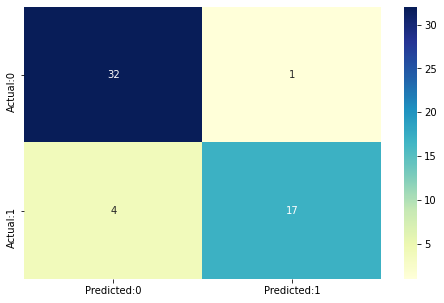

In [21]:
#---------------------------------------------------------------------
#----------------------------- Naive Bayes ---------------------------
#---------------------------------------------------------------------

print('\nTesting the accuracy for Naive Bayes')
bayes = GaussianNB()
bayes.fit(x_train, y_train)
y_pred=bayes.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

print('\nThe Accuracy Score of the confusion matrix is:', accuracy_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()


# Most Accurate Classification Model

After testing out multiple classification models, it is easy to note from the various confusion matrices that Naive Bayes has the highest accuracy of 90.74%. We can also see from the above confusion matrix that there are 32 true negatives, 17 true positives, 1 false positive (Type 1 error) and 4 false negatives (Type 2 error)


# Creating Dummy Variables for Odds Ratio


In [22]:

#Creating dummy variables from the independent categorical variables
df2 = pd.get_dummies(df, columns =['Chest pain type', 'EKG results', 'Slope of ST', 'Number of vessels fluro', 'Thallium'])

#The categorical independent variables are 'Chest pain type', 'EKG results', 'Slope of ST', 'Number of vessels fluro', 'Thallium'
#Reference  
#Chest pain type: atypical
#EKG: 0
#Slope of ST: 1
#Number of vessels fluro: 0
#Thallium: normal

#Renaming column names to save space when dataframe is displayed
df2.rename(columns={'Cholesterol':'Chol', 'FBS over 120':'FBS>120', 
                    'Chest pain type_1':'CP typical', 'Chest pain type_2':'CP asymptomatic', 
                    'Chest pain type_3':'CP non anginal', 'Chest pain type_4':'CP atypical',
                    'EKG results_0':'EKG_0', 'EKG results_1':'EKG_1', 'EKG results_2':'EKG_2',
                    'Slope of ST_1':'ST slope 1', 'Slope of ST_2':'ST slope 2', 'Slope of ST_3':'ST slope 3',
                    'Number of vessels fluro_0':'fluro_0','Number of vessels fluro_1':'fluro_1',
                    'Number of vessels fluro_2':'fluro_2', 'Number of vessels fluro_3':'fluro_3',
                    'Thallium_3':'TI normal', 'Thallium_6':'TI Fixed Defect', 'Thallium_7':'TI Reversable Defect'
                    }, inplace=True)

#The columns that are being dropped are being used as a reference for the odds ratio
df2.drop(['CP atypical', 'EKG_0', 'ST slope 1', 'fluro_0', 'TI normal'], axis=1, inplace=True)
df2 = df2[['Age', 'Sex', 'CP typical', 'CP asymptomatic', 'CP non anginal', 'BP', 'Chol', 'FBS>120', 
            'EKG_1', 'EKG_2', 'Max HR', 'Exercise angina', 'ST depression', 'ST slope 2', 'ST slope 3',
            'fluro_1', 'fluro_2', 'fluro_3', 'TI Fixed Defect', 'TI Reversable Defect', 'Heart Disease']]
print('\n', df2.head())



    Age  Sex  CP typical  CP asymptomatic  CP non anginal   BP  Chol  FBS>120  \
0   70    1           0                0               0  130   322        0   
1   67    0           0                0               1  115   564        0   
2   57    1           0                1               0  124   261        0   
3   64    1           0                0               0  128   263        0   
4   74    0           0                1               0  120   269        0   

   EKG_1  EKG_2  ...  Exercise angina  ST depression  ST slope 2  ST slope 3  \
0      0      1  ...                0            2.4           1           0   
1      0      1  ...                0            1.6           1           0   
2      0      0  ...                0            0.3           0           0   
3      0      0  ...                1            0.2           1           0   
4      0      1  ...                1            0.2           0           0   

   fluro_1  fluro_2  fluro_3  TI Fix

In [23]:
df_constant=add_constant(df2)
#getting all the columns except for the dependent variable
cols=df_constant.columns[:-1]
#training the Logistic Regression model based on the independent and dependent variable
classifier=sm.Logit(df['Heart Disease'],df_constant[cols]).fit()

print(classifier.summary(), '\n')

Optimization terminated successfully.
         Current function value: 0.299370
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Heart Disease   No. Observations:                  270
Model:                          Logit   Df Residuals:                      249
Method:                           MLE   Df Model:                           20
Date:                Mon, 12 Apr 2021   Pseudo R-squ.:                  0.5642
Time:                        14:38:24   Log-Likelihood:                -80.830
converged:                       True   LL-Null:                       -185.48
Covariance Type:            nonrobust   LLR p-value:                 1.613e-33
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.9383      3.008     -1.642      0.101     -10.834       0.957

In [24]:
#taking the exponential of the coefficints to get the odds ratio
params = np.exp(classifier.params)
#taking the exponential of the CI [0.025, 0.975]
conf = np.exp(classifier.conf_int())
#adding the params column to the conf dataframe
conf['OR'] = params
#adding the pvalue to the conf dataframe
pvalue=round(classifier.pvalues,3)
conf['pvalue']=pvalue
#renaming the columns in the conf dataframe
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print('\n', conf, '\n\n')



                       CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                     0.000020       2.604861    0.007167   0.101
Age                       0.925645       1.027414    0.975203   0.345
Sex                       2.036419      21.906949    6.679201   0.002
CP typical                0.013009       0.314984    0.064014   0.001
CP asymptomatic           0.105809       1.260040    0.365135   0.111
CP non anginal            0.047860       0.411439    0.140327   0.000
BP                        1.006042       1.057805    1.031599   0.015
Chol                      0.998131       1.015099    1.006579   0.127
FBS>120                   0.208963       2.255794    0.686570   0.536
EKG_1                     0.002075    2403.861066    2.233597   0.822
EKG_2                     0.854226       4.532345    1.967649   0.112
Max HR                    0.956612       1.003403    0.979728   0.093
Exercise angina           0.682486       4.269290    1.706965   0.253
ST depression     

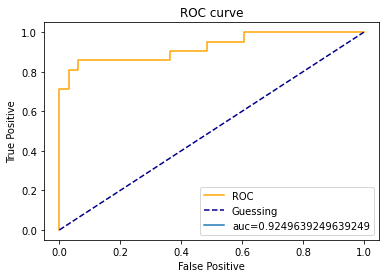

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.91
The Missclassification = 1-Accuracy =  0.09 

Sensitivity or True Positive Rate = TP/(TP+FN) =  0.81
Specificity or True Negative Rate = TN/(TN+FP) =  0.97 

The likelihood that if you have a positive test result, you actually have the disease
Positive Predictive value = TP/(TP+FP) =  0.94
The likelihood that if you have a negative test result, you don't have the disease
Negative predictive Value = TN/(TN+FN) =  0.89 

Probabilty that you test positive but don't have the disease
False Positive value = FP/(TN+FP) =  0.03
Probabilty that you test negative but have the disease
False Negative or Miss Value = FN/(TP+FN) =  0.19 

Positive Likelihood tells us how much to increase the probability of having a disease given a positive test result
Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  26.71 

Negative Likelihood tells us how much to increase the probability of having a disease given a negative test result
Negative likel

In [25]:
#Obtaining the true negative, true positive, false negative and false negative values
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

#When we predict the probability of Heart Disease, it calculates the value in scientific notation
#This converts it to decimal notation
np.set_printoptions(suppress=True)

#The first column is the probability of NOT having Heart Disease, the second column
#is the probability of having it (i.e the column of interest)
y_pred_roc=bayes.predict_proba(x_test)[:,1]

roc_score=roc_auc_score(y_test, y_pred_roc)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_roc)


def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',label='Guessing',linestyle="--")
    plt.plot([1], label='auc='+str(metrics.auc(fpr, tpr)))
    plt.legend()
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('ROC curve')
    plt.legend(loc=4)
    plt.show()
    
plot_roc_curve(fpr,tpr)

#Sensitivity is the metric that evaluattes a model's ability to predict true positives
#Specificity is the metric that evaulates a model's ability to predict true negatives
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)

print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ', "{:.2f}".format((TP+TN)/float(TP+TN+FP+FN)))
print('The Missclassification = 1-Accuracy = ', "{:.2f}".format(1-((TP+TN)/float(TP+TN+FP+FN))), '\n')

#Calculating the probabilty that an actual positive will TEST positive
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', "{:.2f}".format(TP/float(TP+FN)))
#Calculating the probability that an actual negative will TEST negative
print('Specificity or True Negative Rate = TN/(TN+FP) = ', "{:.2f}".format(TN/float(TN+FP)), '\n')

#Calculating the probability that when you test positive, that its ACTUALLY poistive
print('The likelihood that if you have a positive test result, you actually have the disease')
print('Positive Predictive value = TP/(TP+FP) = ', "{:.2f}".format(TP/float(TP+FP)))

#Calculating the probability that when you test negative, that its ACTUALLY negative
print('The likelihood that if you have a negative test result, you don\'t have the disease')
print('Negative predictive Value = TN/(TN+FN) = ', "{:.2f}".format(TN/float(TN+FN)), '\n')

#Calculating the probability that a false alarm will be raised
print('Probabilty that you test positive but don\'t have the disease')
print('False Positive value = FP/(TN+FP) = ', "{:.2f}".format(FP/float(TN+FP)))

#Calculating the probability that a true positive will be missed
print('Probabilty that you test negative but have the disease')
print('False Negative or Miss Value = FN/(TP+FN) = ', "{:.2f}".format(FN/float(TP+FN)), '\n')

print('Positive Likelihood tells us how much to increase the probability of having a disease given a positive test result')
print('Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ', "{:.2f}".format(sensitivity/(1-specificity)), '\n')
print('Negative Likelihood tells us how much to increase the probability of having a disease given a negative test result')
print('Negative likelihood Ratio = (1-Sensitivity)/Specificity = ', "{:.2f}".format((1-sensitivity)/specificity))




# ROC Curve Interpretation

A Receiver Operator Characteristic curve is meant to plot the true positive rate against the false positive rate. A true positive value indicates the patients that were predicted to have Heart Disease and actually had Heart Disease. A false positive  is when a patient is predicted to not have Heart Disease, when in fact they actually do. Thus the true positive rate is the true positive value over all patients that tested positive (i.e. TP/(TP+FN)). Similarly a false positive rate is FP/(TN+FP). The area under the ROC curve (AUC) is meant to determine the models accuracy. The higher the area, the stronger the model is in classification. Ideally, the area under the curve would be equal to 1, or relatively close to it. If the area is 0.5, this signifies that the model is no better than guessing. However, from the graph above, we can see that the AUC is 0.92, which is close to 1.